# **Project Name**    -  **Customer Segmentation**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on **Customer Segmentation** using exploratory data analysis (EDA) with the provided dataset, "Mall_Customers.csv." The dataset contains information on mall customers, including demographic details like gender, age, and annual income, as well as spending patterns like spending scores.

The main objective of this project is to identify and understand different customer segments within a retail environment. These insights can help businesses better target their marketing strategies and improve customer experiences by tailoring services according to each segment's preferences and behaviors. Using various EDA techniques, this project visualizes data patterns, uncovers correlations, and identifies outliers or trends that differentiate customer groups.

The key processes include data cleaning, descriptive analysis, and visualization techniques like scatter plots, histograms, and box plots. Additionally, clustering methods like K-means are applied to form distinct customer segments based on spending patterns and demographics.

This analysis is essential for businesses looking to make data-driven decisions and optimize their marketing strategies by focusing on specific customer segments. The insights derived from this project can drive better customer engagement, targeted promotions, and enhanced customer satisfaction, ultimately contributing to increased profitability.

# **General Guidelines** : -

1. **Understand the Objective**:
   - Clearly define the goal of the project: segmenting customers based on their demographics and spending patterns.
   - The purpose is to identify groups with similar behaviors to enable better-targeted marketing strategies and personalized customer services.

2. **Data Collection**:
   - Use the provided dataset, "Mall_Customers.csv," which contains customer details like `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending Score`.
   - Verify the data structure and understand each feature before proceeding with analysis.

3. **Data Cleaning**:
   - Check for missing values and handle them appropriately using techniques like mean/median imputation or dropping irrelevant columns.
   - Ensure data types are correct, especially for numerical features like `Age` and `Annual Income`.
   - Remove duplicates if present and identify outliers to ensure a clean dataset for analysis.

4. **Exploratory Data Analysis (EDA)**:
   - Analyze the distribution of each feature using histograms, box plots, and descriptive statistics.
   - Use scatter plots to explore the relationship between variables, such as `Annual Income` vs. `Spending Score`.
   - Use correlation matrices to identify potential correlations between numerical features.
   - Conduct group analysis based on categorical data like `Gender` to find gender-based spending patterns.

5. **Data Visualization**:
   - Create at least 12 different visualizations to display key insights. Examples include:
     - Histograms for age and income distribution.
     - Box plots for identifying outliers.
     - Pair plots to visualize relationships between different variables.
     - Pie charts for gender distribution.
     - Heatmaps for correlation matrices.
   - Use Python libraries like `matplotlib` and `seaborn` for visualization.

6. **Clustering Analysis**:
   - Implement clustering algorithms like K-means to segment customers based on selected features (`Annual Income`, `Spending Score`).
   - Determine the optimal number of clusters using the Elbow Method or Silhouette Score.
   - Visualize clusters using scatter plots for better understanding of segment distributions.

7. **Interpretation of Results**:
   - Analyze each cluster and provide a detailed explanation of the identified customer segments.
   - Summarize key findings, such as high-spending customers, budget-conscious customers, etc.
   - Discuss potential business strategies for each segment, such as targeted promotions or loyalty programs.

8. **Documentation**:
   - Maintain clear documentation throughout the project, explaining each step of the analysis.
   - Include comments in the code to ensure readability and understanding for others reviewing the project.
   - Prepare a summary report to highlight key findings and recommendations.

9. **Best Practices**:
   - Use appropriate variable names and follow PEP 8 guidelines when coding in Python.
   - Validate the models and visualizations by checking for inconsistencies.
   - Regularly save progress and ensure backup copies of data and code are maintained.

10. **Project Presentation**:
    - Summarize the project in a presentation or report format, focusing on the business implications of each customer segment.
    - Highlight visualizations and insights that are most relevant to stakeholders.
    - Make actionable recommendations based on the analysis to guide future marketing efforts.

# ***Let's Begin !***

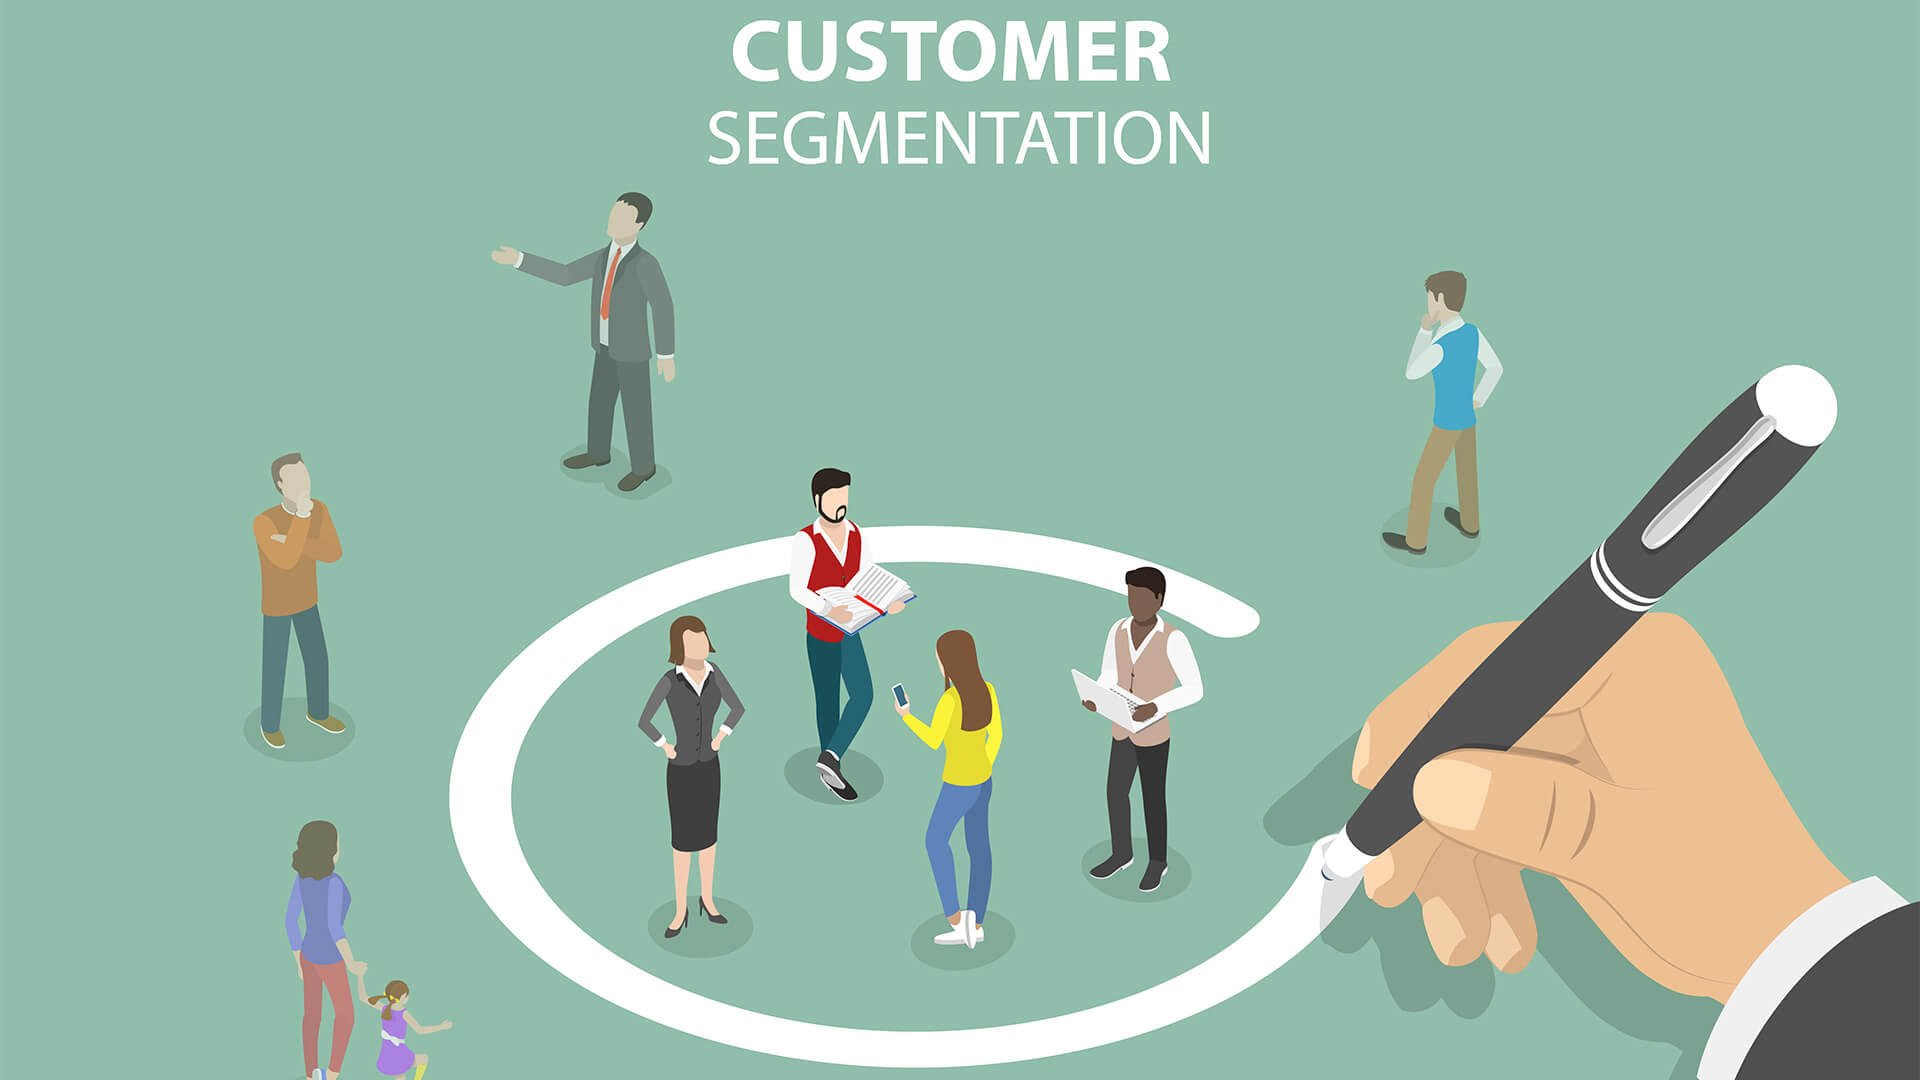

# **Importing Essential Libraries**

Start by importing the necessary libraries and loading the dataset:



*   pandas for data manipulation.
*   matplotlib and seaborn for visualization.
*   numpy for numerical operations.
*   sklearn for any machine learning models.







In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

#csv file location
file_path= "/content/drive/MyDrive/Data_Project/EDA_Capstone_Project_Customer_Segmentation/Mall_Customers.csv"

# Load the data into a pandas DataFrame called 'df'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Understanding the Dataset**

Analyze the structure of the dataset, including the data types and summary statistics:

*   Use df.info() to see data types and missing values.
*   Use df.describe() to get summary statistics.
*   Identify the key features/columns for analysis.



In [3]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Display summary statistics for numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Display column names for a quick overview
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# **Data Cleaning**

Clean the dataset to handle any missing values or outliers:

*   **Handling Missing Values**: Use df.isnull().sum() to check for missing values and decide how to handle them (e.g., filling or dropping).
*   **Removing Duplicates**: Use df.drop_duplicates() if there are any duplicate rows.
*   **Handling Outliers**: Visualize using box plots and remove or treat outliers using IQR (Interquartile Range) or z-score.



In [6]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
# Removing duplicates
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# **Data Visualization**

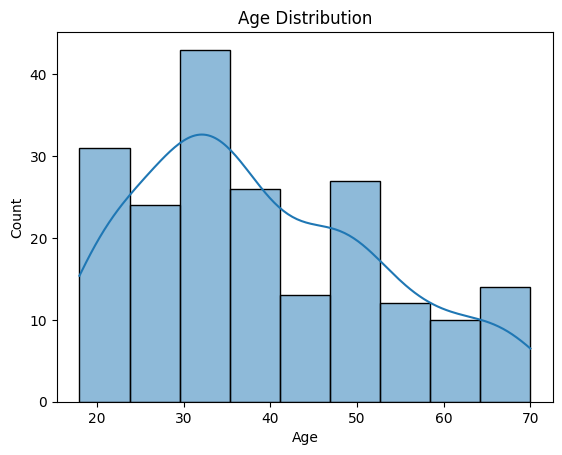

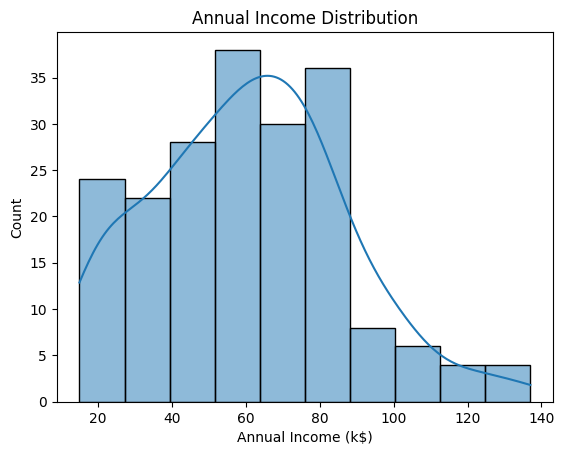

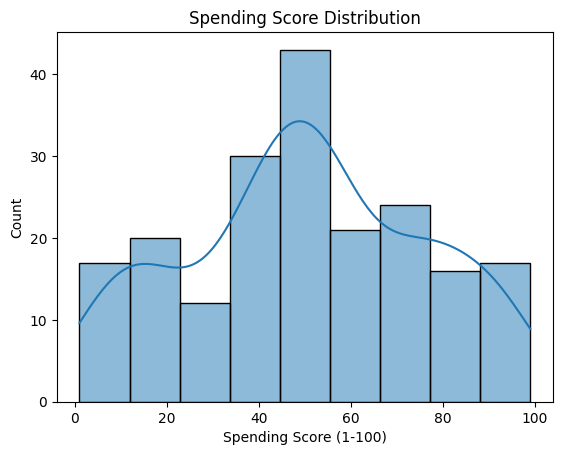

In [15]:
# Plot distributions of numerical features
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()


sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()

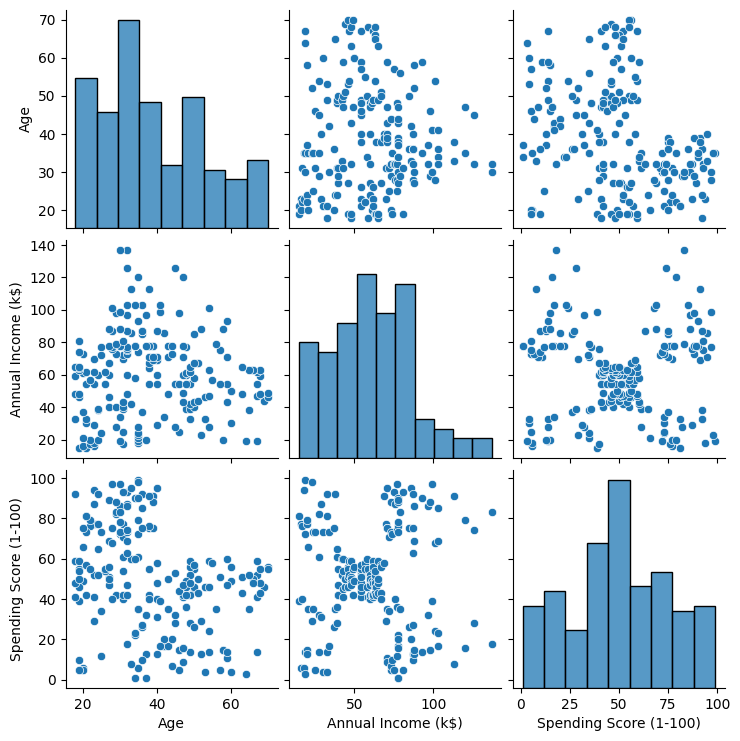

In [18]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

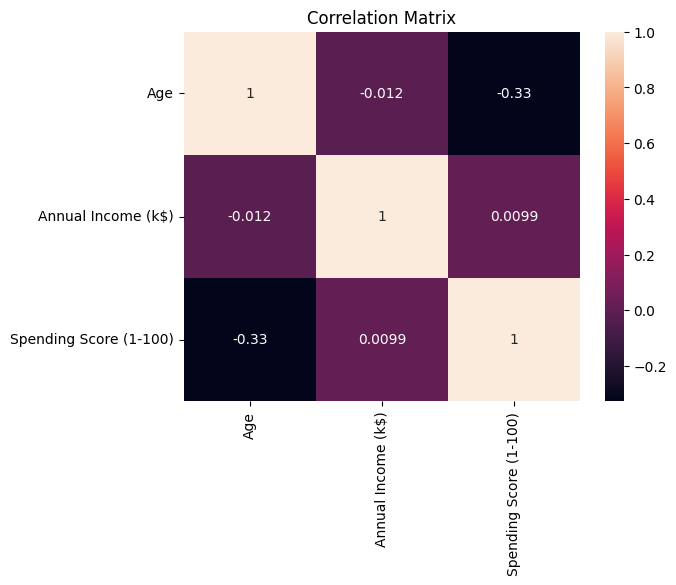

In [21]:
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

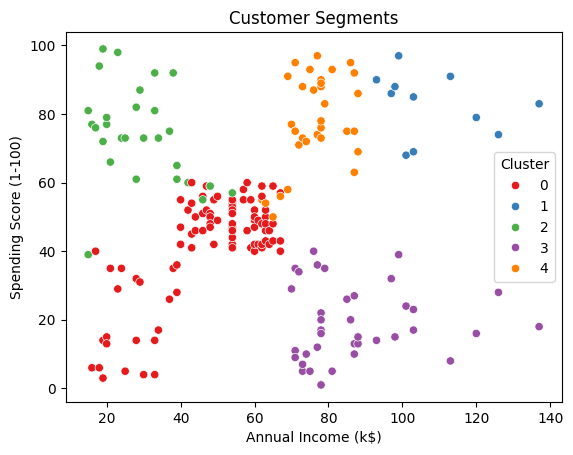

In [23]:
from sklearn.cluster import KMeans

# Extract features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df,palette='Set1')
plt.title('Customer Segments')
plt.show()

# **Conclusion**

The Customer Segmentation project provided valuable insights into the demographics and purchasing behavior of customers at the mall. Through exploratory data analysis (EDA), we identified key patterns and trends, such as the distribution of customers' age, income levels, and spending habits. The use of clustering techniques, particularly K-means, allowed us to classify customers into distinct groups based on their `Annual Income` and `Spending Score`, highlighting different customer profiles, including high-spenders, budget-conscious shoppers, and average spenders.

By understanding these segments, businesses can better tailor their marketing strategies to each group, offering personalized promotions, targeted advertisements, and improved customer experiences. For example, high-income, high-spending customers could be targeted with premium offers, while strategies for engaging younger, low-spending segments may focus on loyalty programs or discounts.

Overall, the project emphasized the importance of data-driven decision-making in enhancing customer satisfaction and maximizing revenue potential. The insights gained can serve as a foundation for future analysis and more sophisticated models that consider additional factors such as customer preferences and online behavior. By continuously refining customer segments, the mall can adapt to changing customer needs and maintain a competitive edge in the market.